![alt text](images/Kusto.jpg "Kusto Magic")

# kqlmagic Quick Start
1. Press F11 to switch browser to full screen mode  
2. If in running jupyter lab, in View tab, select 'Single-Document Mode' and 'Presentation Mode' or  (Ctrl + Shift + D)  
3. In Kernel tab, select 'Restart Kernel and Clear All Outputs...', to start from fresh
4. Repeat: press Shift+Enter to run cells sequentially

## Make sure that you have the lastest version of  kqlmagic
Download kqlmagic from github and install/update
(if latest version is already installed you can skip this step)

In [ ]:
# !pip install git+git://github.com/mbnshtck/jupyter-kql-magic.git


## Add kqlmagic to notebook magics

C:\My Projects\KqlMagic\src



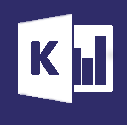

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\My Projects\KqlMagic\notebooks
popd -> c:\My Projects\KqlMagic\notebooks


In [1]:
%pushd C:\My Projects\KqlMagic\src
%reload_ext kql
%popd

### <span style="color:blue">*Notice - information in the kqlmagic banner, and the note below it, with version and location of the open source code'*</span>

### <span style="color:blue">*Notice - after kql magic was loaded, 'kql reference was added to Help memnu (Help tab)'*</span>

## Connect to database@cluster

In [2]:
%kql kusto://code().cluster('help').database('Samples')

<IPython.core.display.Javascript object>

### <span style="color:blue">*Notice - pupup window that opened with the database@cluster schema*</span>

### <span style="color:blue">*Notice - Help menu contains the databse@cluster schema*</span>

## Once connected you can query the current database@cluster

In [ ]:
%kql PageViews | summarize count() by Language | sort by count_ | limit 10

### <span style="color:blue">*Notice -current database@cluster, shown before the query results*</span>

### <span style="color:blue">*Notice - execution time, and number of returned records, shown after the query results*</span>

## Python code can access the result by the \_ variable

In [ ]:
_

## Converts result data to a dataframe

In [ ]:
df = _.to_dataframe()
df

In [ ]:
df.head()

In [ ]:
df.Language

In [ ]:
df.min()

In [ ]:
df.to_json()

## Excution of another cell overrides \_ , However,  \_kql\_raw\_result\_ python variable holds last kql query result 

In [ ]:
_

In [ ]:
_kql_raw_result_

In [ ]:
_

## Show a chart, render the query to the proper chart

In [ ]:
%kql PageViews | summarize count() by Language | sort by count_ | limit 10 | render piechart title='my pie chart' 

### <span style="color:blue">*Notice - the chart is interactive, hoover to the right upper corner to get the menu, click on the legend to toggle facets, hoover on the chart to get value and percentage*</span>

## Assign kql query result to a python variable

In [ ]:
%kql my_bar_chart << PageViews | summarize count() by Language | sort by count_ | limit 10 | render barchart title='my bar chart'

### <span style="color:blue">*Notice - nothing is displayed when the result is assigtned to a variable*</span>

## Display kql result object

In [ ]:
my_bar_chart

## Cell mixed with single line kql queries 

In [ ]:
%kql bar_chart << PageViews | summarize count() by Language | sort by count_ | limit 10 | render barchart title='my bar chart'
print(bar_chart)
%kql pie_chart << PageViews | summarize count() by Language | sort by count_ | limit 5 | render piechart title='my pie chart'
display(bar_chart)
display(pie_chart)

### <span style="color:blue">*Notice - single line magics (starts with only one \%) can share the same cell with python code*</span>

## Multiline query 

In [ ]:
%%kql PageViews 
    | summarize count() by Language 
    | sort by count_ 
    | limit 10 
    | render columnchart title='my column chart' 

### <span style="color:blue">*Notice - that this is a multiline magic, it starts with \%\%*</span>

## Show last chart result as a table

In [ ]:
_.show_table()

## Show last result in a popup window

In [ ]:
_.popup()

## Resize poup window, and to adjust the chart inside the window press F5

## Show last chart result as a table in a popup window

In [ ]:
_kql_raw_result_.popup_table()

## More complex chart

In [ ]:
%kql PageViews | summarize count() by Language | sort by count_ | extend count2 = count_*count_ | limit 10 | render piechart title='my pie chart #2' 

## Convert result data to dictionary of columns

In [ ]:
dict_of_columns = _kql_raw_result_.to_dict()
print(dict_of_columns)

In [ ]:
_kql_raw_result_.to_csv('csv_file.csv')

In [ ]:
!type csv_file.csv

## Get last kql query attributes 

In [ ]:
_kql_raw_result_.query

In [ ]:
_kql_raw_result_.title

In [ ]:
_kql_raw_result_.visualization

In [ ]:
_kql_raw_result_.records_count

In [ ]:
_kql_raw_result_.columns_name

In [ ]:
_kql_raw_result_.start_time

In [ ]:
_kql_raw_result_.end_time

In [ ]:
_kql_raw_result_.elapsed_timespan

In [ ]:
_kql_raw_result_.connection

In [ ]:
_kql_raw_result_.suppress_result

In [5]:
_kql_raw_result_.options

{'auto_dataframe': False,
 'short_errors': True,
 'feedback': True,
 'show_conn_list': True,
 'columns_to_local_vars': True,
 'show_query_time': True,
 'enable_suppress_result': True,
 'plotly_fs_includejs': False,
 'window': False,
 'auto_limit': 0,
 'display_limit': None,
 'prettytable_style': 'DEFAULT',
 'last_raw_result_var': '_kql_raw_result_',
 'table_package': 'prettytable',
 'plot_package': 'matplotlib',
 'dsn_filename': 'odbc.ini',
 'validate_connection_string': True,
 'auto_popup_schema': True,
 'help': False,
 'show_schema': False,
 'version': False}

## Kql query with options

In [10]:
%%kql -c2lv PageViews 
    | summarize count() by Language 
    | sort by count_ 
    | limit 10 
    | render columnchart title='my column chart' 

### <span style="color:blue">*Notice - option are specified before the query*</span>

### <span style="color:blue">*Notice - c2lv abbreviation of columns_to_local_vars options, that returns data result in local variables from column names*</span>

### result data is assigned to local variables with columns names

In [13]:
Language

('en', 'commons.m', 'de', 'cs', 'ar', 'da', 'ca', 'bg', 'el', 'be')

In [14]:
count_

(16266774,
 15137646,
 14641824,
 2804334,
 2785242,
 1125036,
 1048386,
 819522,
 507336,
 385806)